In [103]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install torch


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install ax-platform


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install scikit-optimize


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle
from scipy.io import loadmat

In [108]:
# 1. Load Data (Assume the .mat file is available)
data = loadmat('/Users/yifanzhang/Desktop/DNN/firstDataset.mat')

In [109]:

# Extracting the 'Data' array from the .mat structure
data_content = data['Data']

# Extract 'signal', 'mean', and 'std' from the loaded data
signal = data_content[0][0]['signal']  # Raw signal data
mean = data_content[0][0]['mean']  # Normalization means
std = data_content[0][0]['std']  # Normalization standard deviations

# 2. Unwrap the signal data to get individual variables
imep = signal[0][0].flatten()
nox = signal[1][0].flatten()
pm = signal[2][0].flatten()
mprr = signal[3][0].flatten()

# inputs
doi_main = signal[4][0].flatten()  # Flatten to 1D array
soi_pre = signal[5][0].flatten()
soi_main = signal[6][0].flatten()
doi_h2 = signal[7][0].flatten()

# inputs (old data)
imep_old = imep[:-1]  # Truncate one element from imep
nox_old = nox[:-1]
pm_old = pm[:-1]
mprr_old = mprr[:-1]

# outputs (new data)
imep_new = imep[1:]  # Remove the first element of imep
nox_new = nox[1:]
pm_new = pm[1:]
mprr_new = mprr[1:]

# Pad old data to make lengths match
# Add NaN or the last value of each array to match length of the original
imep_old = np.append(imep_old, imep_old[-1])
nox_old = np.append(nox_old, nox_old[-1])
pm_old = np.append(pm_old, pm_old[-1])
mprr_old = np.append(mprr_old, mprr_old[-1])

# Pad new data (imep_new, nox_new, pm_new, mprr_new) to the same length
imep_new = np.append(imep_new, imep_new[-1])  # Add the last element of imep_new
nox_new = np.append(nox_new, nox_new[-1])
pm_new = np.append(pm_new, pm_new[-1])
mprr_new = np.append(mprr_new, mprr_new[-1])

# 4. Extract the means and standard deviations from the data
IMEP_mean = mean[0][0].item()
NOx_mean = mean[1][0].item()
PM_mean = mean[2][0].item()
MPRR_mean = mean[3][0].item()

IMEP_std = std[0][0].item()
NOx_std = std[1][0].item()
PM_std = std[2][0].item()
MPRR_std = std[3][0].item()

# Now create arrays for means and stds
output_means = np.array([IMEP_mean, NOx_mean, PM_mean, MPRR_mean])
output_stds = np.array([IMEP_std, NOx_std, PM_std, MPRR_std])

# 5. Prepare the dataset for training (Ensure correct shape)
inputs = np.column_stack((doi_main, soi_pre, soi_main, doi_h2, imep_old, nox_old, pm_old, mprr_old))
outputs = np.column_stack((imep_new, nox_new, pm_new, mprr_new))

# 6. Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)



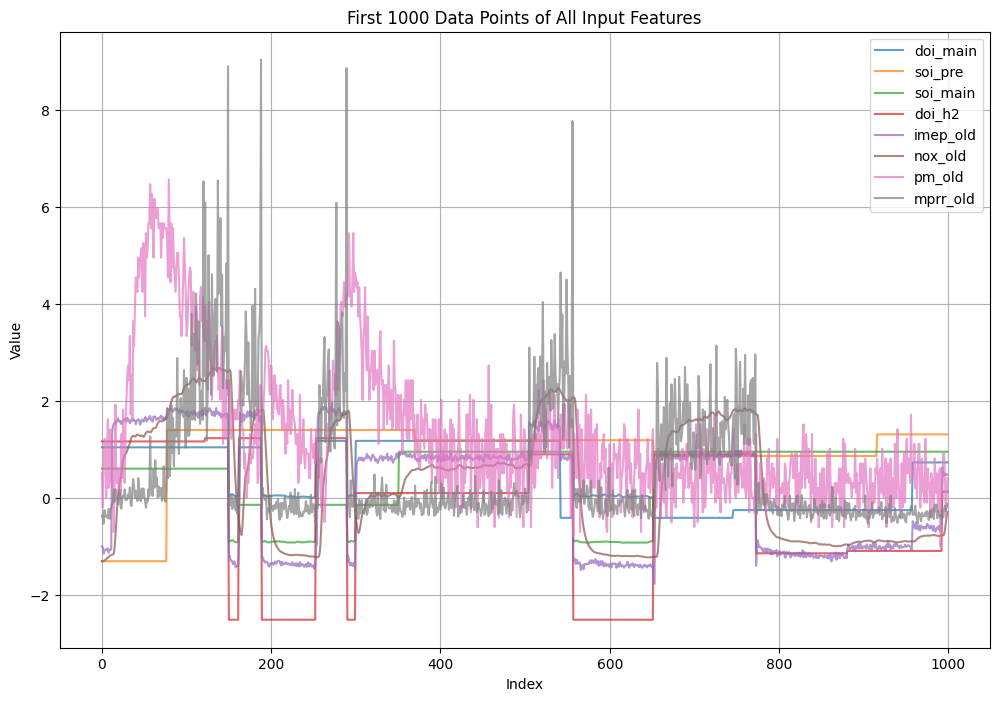

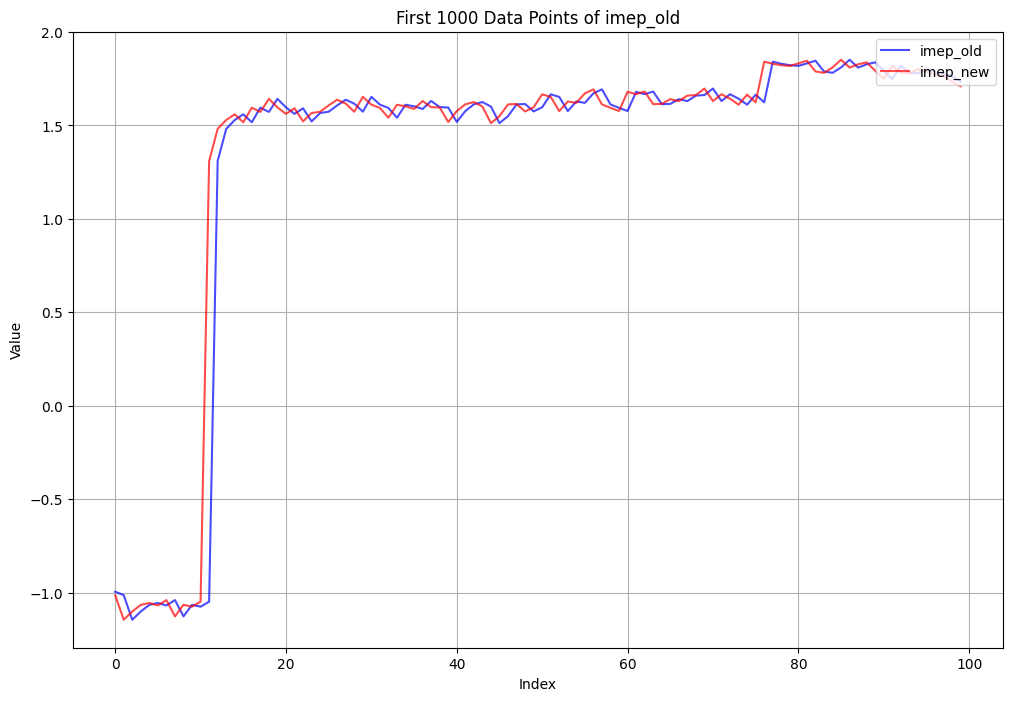

In [110]:
import matplotlib.pyplot as plt

# Number of data points to plot
n_points = 1000

# Extract the first 1000 data points for each input feature
doi_main_1000 = doi_main[:n_points]
soi_pre_1000 = soi_pre[:n_points]
soi_main_1000 = soi_main[:n_points]
doi_h2_1000 = doi_h2[:n_points]
imep_old_1000 = imep_old[:n_points]
nox_old_1000 = nox_old[:n_points]
pm_old_1000 = pm_old[:n_points]
mprr_old_1000 = mprr_old[:n_points]

# Create a plot for all inputs
plt.figure(figsize=(12, 8))

# Plot each input feature
plt.plot(doi_main_1000, label='doi_main', alpha=0.7)
plt.plot(soi_pre_1000, label='soi_pre', alpha=0.7)
plt.plot(soi_main_1000, label='soi_main', alpha=0.7)
plt.plot(doi_h2_1000, label='doi_h2', alpha=0.7)
plt.plot(imep_old_1000, label='imep_old', alpha=0.7)
plt.plot(nox_old_1000, label='nox_old', alpha=0.7)
plt.plot(pm_old_1000, label='pm_old', alpha=0.7)
plt.plot(mprr_old_1000, label='mprr_old', alpha=0.7)

# Adding title, labels, and legend
plt.title('First 1000 Data Points of All Input Features')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()






# this is for imep

# Number of data points to plot
n_points = 100

# Extract the first 1000 data points for imep_old
imep_old_1000 = imep_old[:n_points]
imep_new_1000 = imep_new[:n_points]
# Create a plot for imep_old only
plt.figure(figsize=(12, 8))

# Plot the imep_old feature
plt.plot(imep_old_1000, label='imep_old', color='b', alpha=0.7)

plt.plot(imep_new_1000, label='imep_new', color='r', alpha=0.7)

# Adding title, labels, and legend
plt.title('First 1000 Data Points of imep_old')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()




Epoch [1/5000], Loss: 0.3935, Val Loss: 0.2528, LR: 0.001000
Epoch [2/5000], Loss: 0.3081, Val Loss: 0.2397, LR: 0.001000
Epoch [3/5000], Loss: 0.2976, Val Loss: 0.2351, LR: 0.001000
Epoch [4/5000], Loss: 0.2930, Val Loss: 0.2342, LR: 0.001000
Epoch [5/5000], Loss: 0.2892, Val Loss: 0.2323, LR: 0.001000
Epoch [6/5000], Loss: 0.2927, Val Loss: 0.2307, LR: 0.001000
Epoch [7/5000], Loss: 0.2873, Val Loss: 0.2336, LR: 0.001000
Epoch [8/5000], Loss: 0.2877, Val Loss: 0.2288, LR: 0.001000
Epoch [9/5000], Loss: 0.2905, Val Loss: 0.2288, LR: 0.001000
Epoch [10/5000], Loss: 0.2871, Val Loss: 0.2271, LR: 0.001000
Epoch [11/5000], Loss: 0.2850, Val Loss: 0.2287, LR: 0.001000
Epoch [12/5000], Loss: 0.2869, Val Loss: 0.2243, LR: 0.001000
Epoch [13/5000], Loss: 0.2823, Val Loss: 0.2233, LR: 0.001000
Epoch [14/5000], Loss: 0.2844, Val Loss: 0.2242, LR: 0.001000
Epoch [15/5000], Loss: 0.2845, Val Loss: 0.2249, LR: 0.001000
Epoch [16/5000], Loss: 0.2851, Val Loss: 0.2234, LR: 0.001000
Epoch [17/5000], 

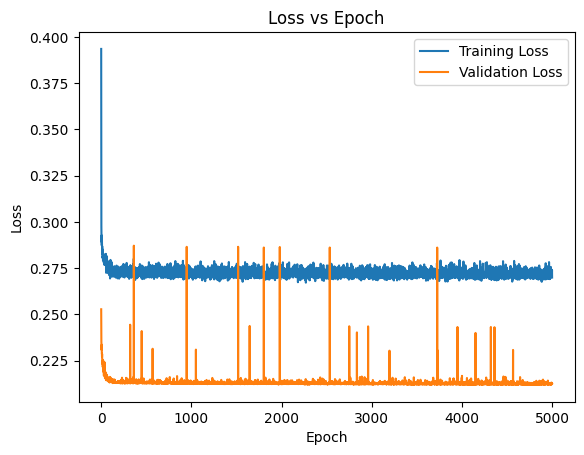

In [111]:

import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau


# We implement L1 regularization:
# Define L1 Regularization function
def l2_regularization(model, lambda_reg):
    # Compute L1 norm, which is the sum of the absolute values of the weights
    l2_norm = sum(p.pow(2).sum() for p in model.parameters())  # Sum of squared weights
    return lambda_reg * l2_norm



class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.LeakyReLU(0.99)
        self.dropout1 = nn.Dropout(p=0.1)  # drop out
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.LeakyReLU(0.001)
        self.dropout2 = nn.Dropout(p=0.1)  
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Apply dropout after activation
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Apply dropout after activation
        x = self.fc3(x)
        return x



# Initialize the model
input_size = 8
# hidden_size_1 = 98  # As per the optimized architecture
# hidden_size_2 = 97  # As per the optimized architecture
hidden_size_1 = 31  # As per the optimized architecture
hidden_size_2 = 23  # As per the optimized architecture
output_size = 4  

model = DNNModel(input_size, hidden_size_1, hidden_size_2, output_size)

# 8. Define loss function and optimizer with L2 regularization (weight decay)
criterion = nn.MSELoss()  # Mean Squared Error loss

# Define the optimizer with L2 regularization (weight_decay)
weight_decay = 1e-4  # tried smaller weight_decay, doesn't change anything
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.6, patience=10, threshold=0.0001, min_lr=1e-5)


# try a different L2 regularization 
# save the model to the lowest validation loss for each epoches 
# increase epoches (use GPU provided)
# implement scheduled learning rate 
# hyperperameters optimization, bayesian optimization (sample code from AX version, another file of code for this)
# digital twins
# attention all you need paper, talking abotu attention blocks


# Batch size scaling factor
batch_size = 32 # tried 8, 16, 32
batch_size_scale = 2  # You can adjust this value to scale the batch size

# 9. Shuffle the data before splitting
# Shuffling the inputs and outputs (shuffle or doesn't shuffle are the same, no difference)
inputs_shuffled, outputs_shuffled = shuffle(X_train_tensor.numpy(), y_train_tensor.numpy(), random_state=42)

# 10. Split the shuffled data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs_shuffled, outputs_shuffled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert back to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 11. Create DataLoaders with batch size scaling
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor),
                                           batch_size=batch_size * batch_size_scale, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor),
                                         batch_size=batch_size * batch_size_scale, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor),
                                          batch_size=batch_size * batch_size_scale, shuffle=True)

# Store loss values for plotting
train_losses = []
val_losses = []

# Define L1 regularization strength
lambda_reg = 1e-4  

def plot_weight_distribution(model):
    # Get all weights from the model
    all_weights = torch.cat([param.view(-1) for param in model.parameters()])
    
    # Plot the histogram of weight values
    plt.hist(all_weights.detach().cpu().numpy(), bins=50)
    plt.title("Weight Distribution")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.show()



lowest_val_loss = float('inf')  # Start with a large number


# 12. Training Loop
num_epochs = 5000 # 1000 echos , early stopping is a good idea
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for i, (inputs_batch, targets_batch) in enumerate(train_loader):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs_batch)  # inputs_batch already has batch size
        loss = criterion(outputs, targets_batch)

        # Add L2 regularization to the loss
        l2_loss = l2_regularization(model, lambda_reg)
        loss += l2_loss  # Total loss with L1 regularization

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Load the saved model
    #model.load_state_dict(torch.load('best_model.pth', weights_only=True))


    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_batch, targets_batch in val_loader:
            outputs = model(inputs_batch)
            val_loss += criterion(outputs, targets_batch).item()
            
    # Store losses for plotting
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, LR: {optimizer.param_groups[0]['lr']:.6f}")

    scheduler.step(val_loss)  # Adjusts the learning rate based on validation loss
    
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        # Save the model state_dict
        torch.save(model.state_dict(), 'best_model.pth')  # Save the model


# plot_weight_distribution(model)
 


# 13. Plot the loss vs epoch graph
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.show()




















In [114]:


# 10. Evaluate the model on the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_val = model(X_val_tensor)
    y_pred_test = model(X_test_tensor)

    # Denormalize the predicted and actual values
    y_pred_train_denormalized = y_pred_train.numpy() * output_stds + output_means
    y_pred_val_denormalized = y_pred_val.numpy() * output_stds + output_means
    y_pred_test_denormalized = y_pred_test.numpy() * output_stds + output_means

    y_train_denormalized = y_train_tensor.numpy() * output_stds + output_means
    y_val_denormalized = y_val_tensor.numpy() * output_stds + output_means
    y_test_denormalized = y_test_tensor.numpy() * output_stds + output_means

    
    # Calculate MAE, RMSE, R² for training, validation, and testing
    def compute_metrics(true, pred):
        mae = mean_absolute_error(true, pred)
        rmse = np.sqrt(mean_squared_error(true, pred))
        r2 = r2_score(true, pred)
        return mae, rmse, r2

    # Preparing data for the final report
    metrics_data = {
        'y1 (IMEP)': [[], [], []],   # [train, validation, test]
        'y2 (NOx)': [[], [], []],
        'y3 (PM)': [[], [], []],
        'y4 (MPRR)': [[], [], []]
    }

    # Collecting metrics for each output variable (IMEP, NOx, PM, MPRR)
    for i, label in enumerate(['IMEP', 'NOx', 'PM', 'MPRR']):
        mae_train, rmse_train, r2_train = compute_metrics(y_train_denormalized[:, i], y_pred_train_denormalized[:, i])
        mae_val, rmse_val, r2_val = compute_metrics(y_val_denormalized[:, i], y_pred_val_denormalized[:, i])
        mae_test, rmse_test, r2_test = compute_metrics(y_test_denormalized[:, i], y_pred_test_denormalized[:, i])

        # Store the metrics in the dictionary
        metrics_data[f'y{i+1} ({label})'][0].extend([mae_train, mae_val, mae_test])
        metrics_data[f'y{i+1} ({label})'][1].extend([rmse_train, rmse_val, rmse_test])
        metrics_data[f'y{i+1} ({label})'][2].extend([r2_train, r2_val, r2_test])

    # Print the metrics table

    print(f"\n{'Metrics Data (Number of Data)':<50} {'y1':<20} {'y2':<20} {'y3':<20} {'y4':<20}")
    
    # MAE
    print(f"{'MAE*':<50} {metrics_data['y1 (IMEP)'][0][0]/100000:<10.3f} {metrics_data['y2 (NOx)'][0][0]:<10.3f} "
        f"{metrics_data['y3 (PM)'][0][0]:<10.3f} {metrics_data['y4 (MPRR)'][0][0]/100000:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][0][1]/100000:<10.3f} {metrics_data['y2 (NOx)'][0][1]:<10.3f} "
        f"{metrics_data['y3 (PM)'][0][1]:<10.3f} {metrics_data['y4 (MPRR)'][0][1]/100000:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][0][2]/100000:<10.3f} {metrics_data['y2 (NOx)'][0][2]:<10.3f} "
        f"{metrics_data['y3 (PM)'][0][2]:<10.3f} {metrics_data['y4 (MPRR)'][0][2]/100000:<10.3f}")
    
    # RMSE
    print(f"\n{'RMSE**':<50} {metrics_data['y1 (IMEP)'][1][0]/100000:<10.3f} {metrics_data['y2 (NOx)'][1][0]:<10.3f} "
        f"{metrics_data['y3 (PM)'][1][0]:<10.3f} {metrics_data['y4 (MPRR)'][1][0]/100000:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][1][1]/100000:<10.3f} {metrics_data['y2 (NOx)'][1][1]:<10.3f} "
        f"{metrics_data['y3 (PM)'][1][1]:<10.3f} {metrics_data['y4 (MPRR)'][1][1]/100000:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][1][2]/100000:<10.3f} {metrics_data['y2 (NOx)'][1][2]:<10.3f} "
        f"{metrics_data['y3 (PM)'][1][2]:<10.3f} {metrics_data['y4 (MPRR)'][1][2]/100000:<10.3f}")
    
    # R2 score
    print(f"\n{'R2 score':<50} {metrics_data['y1 (IMEP)'][2][0]:<10.3f} {metrics_data['y2 (NOx)'][2][0]:<10.3f} "
        f"{metrics_data['y3 (PM)'][2][0]:<10.3f} {metrics_data['y4 (MPRR)'][2][0]:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][2][1]:<10.3f} {metrics_data['y2 (NOx)'][2][1]:<10.3f} "
        f"{metrics_data['y3 (PM)'][2][1]:<10.3f} {metrics_data['y4 (MPRR)'][2][1]:<10.3f}")
    print(f"{'':<50} {metrics_data['y1 (IMEP)'][2][2]:<10.3f} {metrics_data['y2 (NOx)'][2][2]:<10.3f} "
        f"{metrics_data['y3 (PM)'][2][2]:<10.3f} {metrics_data['y4 (MPRR)'][2][2]:<10.3f}")








# normalized version
# 10. Evaluate the model on the test set
# model.eval()  # Set model to evaluation mode
# with torch.no_grad():
#     y_pred_train = model(X_train_tensor)
#     y_pred_val = model(X_val_tensor)
#     y_pred_test = model(X_test_tensor)

#     # Calculate MAE, RMSE, R² for training, validation, and testing
#     def compute_metrics(true, pred):
#         mae = mean_absolute_error(true, pred)
#         rmse = np.sqrt(mean_squared_error(true, pred))
#         r2 = r2_score(true, pred)
#         return mae, rmse, r2

#     # Preparing data for the final report
#     metrics_data = {
#         'y1 (IMEP)': [[], [], []],   # [train, validation, test]
#         'y2 (NOx)': [[], [], []],
#         'y3 (PM)': [[], [], []],
#         'y4 (MPRR)': [[], [], []]
#     }

# ## scatter plot for actual and pred value after training


#     # Collecting metrics for each output variable (IMEP, NOx, PM, MPRR)
#     for i, label in enumerate(['IMEP', 'NOx', 'PM', 'MPRR']):
#         mae_train, rmse_train, r2_train = compute_metrics(y_train_tensor[:, i].numpy(), y_pred_train[:, i].numpy())
#         mae_val, rmse_val, r2_val = compute_metrics(y_val_tensor[:, i].numpy(), y_pred_val[:, i].numpy())
#         mae_test, rmse_test, r2_test = compute_metrics(y_test_tensor[:, i].numpy(), y_pred_test[:, i].numpy())

#         # Store the metrics in the dictionary
#         metrics_data[f'y{i+1} ({label})'][0].extend([mae_train, mae_val, mae_test])
#         metrics_data[f'y{i+1} ({label})'][1].extend([rmse_train, rmse_val, rmse_test])
#         metrics_data[f'y{i+1} ({label})'][2].extend([r2_train, r2_val, r2_test])

#     # Print the metrics table
#     print(f"\n{'Metrics Data (Number of Data)':<50} {'y1':<20} {'y2':<20} {'y3':<20} {'y4':<20}")
#     print(f"{'MAE*':<50} {metrics_data['y1 (IMEP)'][0][0]:<10.3f} {metrics_data['y2 (NOx)'][0][0]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][0][0]:<10.3f} {metrics_data['y4 (MPRR)'][0][0]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][0][1]:<10.3f} {metrics_data['y2 (NOx)'][0][1]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][0][1]:<10.3f} {metrics_data['y4 (MPRR)'][0][1]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][0][2]:<10.3f} {metrics_data['y2 (NOx)'][0][2]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][0][2]:<10.3f} {metrics_data['y4 (MPRR)'][0][2]:<10.3f}")

#     print(f"\n{'RMSE**':<50} {metrics_data['y1 (IMEP)'][1][0]:<10.3f} {metrics_data['y2 (NOx)'][1][0]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][1][0]:<10.3f} {metrics_data['y4 (MPRR)'][1][0]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][1][1]:<10.3f} {metrics_data['y2 (NOx)'][1][1]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][1][1]:<10.3f} {metrics_data['y4 (MPRR)'][1][1]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][1][2]:<10.3f} {metrics_data['y2 (NOx)'][1][2]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][1][2]:<10.3f} {metrics_data['y4 (MPRR)'][1][2]:<10.3f}")

#     print(f"\n{'R2 score':<50} {metrics_data['y1 (IMEP)'][2][0]:<10.3f} {metrics_data['y2 (NOx)'][2][0]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][2][0]:<10.3f} {metrics_data['y4 (MPRR)'][2][0]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][2][1]:<10.3f} {metrics_data['y2 (NOx)'][2][1]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][2][1]:<10.3f} {metrics_data['y4 (MPRR)'][2][1]:<10.3f}")
#     print(f"{'':<50} {metrics_data['y1 (IMEP)'][2][2]:<10.3f} {metrics_data['y2 (NOx)'][2][2]:<10.3f} "
#         f"{metrics_data['y3 (PM)'][2][2]:<10.3f} {metrics_data['y4 (MPRR)'][2][2]:<10.3f}")




Metrics Data (Number of Data)                      y1                   y2                   y3                   y4                  
MAE*                                               0.157      16.797     0.021      0.222     
                                                   0.157      17.084     0.021      0.217     
                                                   0.154      16.702     0.021      0.228     

RMSE**                                             0.318      24.830     0.026      0.688     
                                                   0.320      26.110     0.026      0.606     
                                                   0.298      25.347     0.026      0.742     

R2 score                                           0.972      0.995      0.557      0.549     
                                                   0.972      0.995      0.563      0.610     
                                                   0.976      0.995      0.543      0.519     


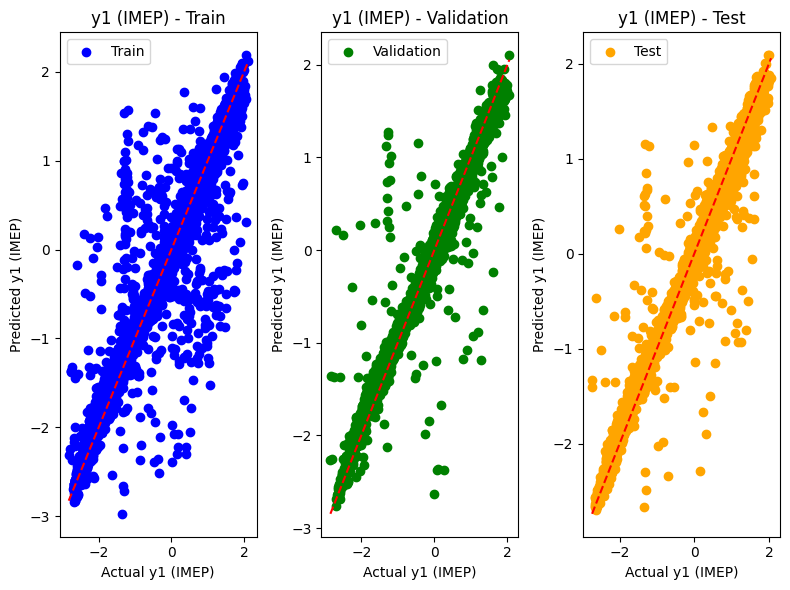

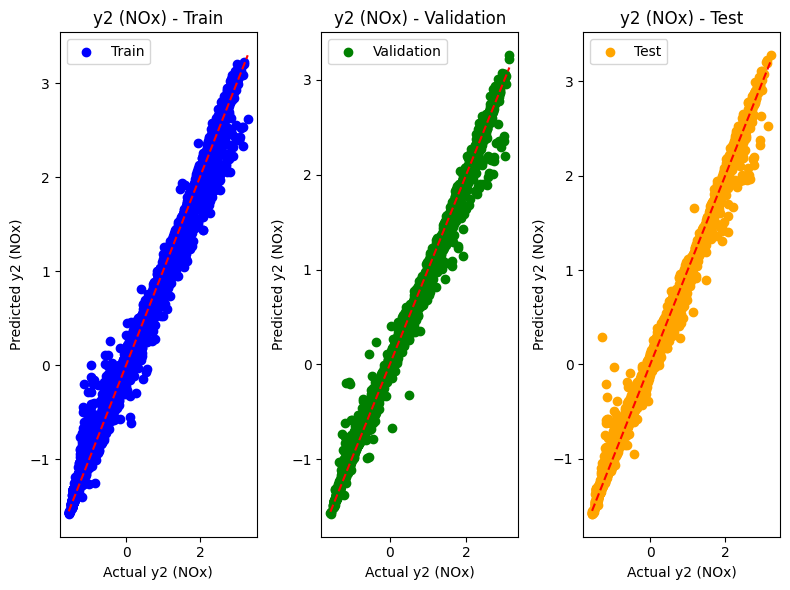

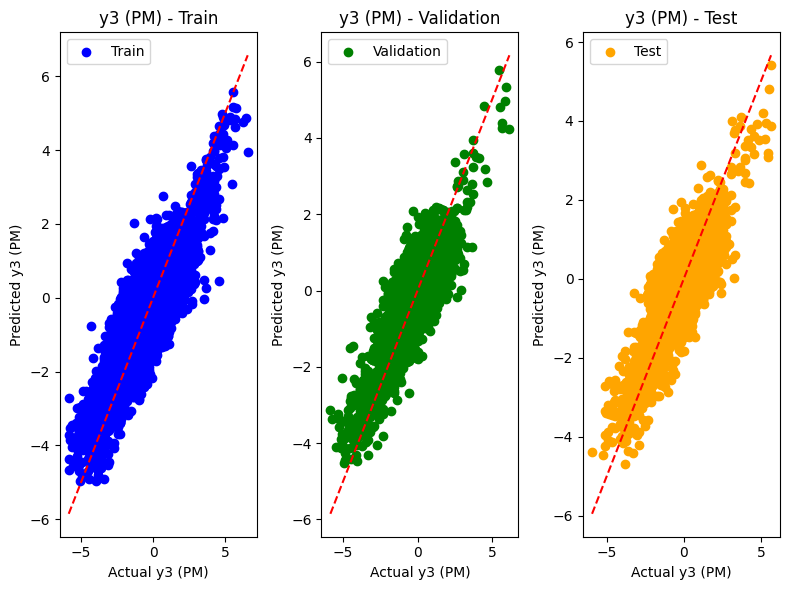

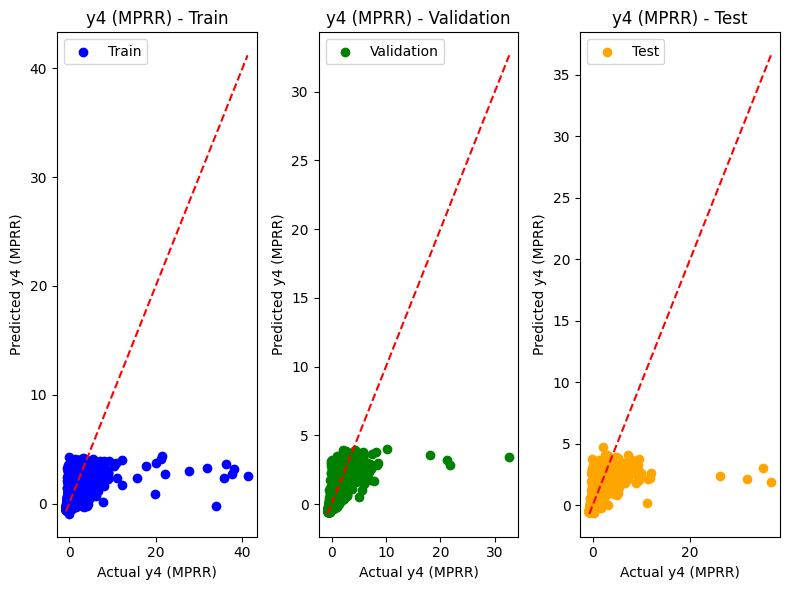

In [113]:

# Prepare the actual values (these would come from your dataset, assuming y_train, y_val, y_test)
y_train_actual = y_train_tensor.numpy()  # Replace with your actual data
y_val_actual = y_val_tensor.numpy()
y_test_actual = y_test_tensor.numpy()

# Convert predictions to numpy arrays
y_pred_train = y_pred_train.numpy()
y_pred_val = y_pred_val.numpy()
y_pred_test = y_pred_test.numpy()

# Define output variables
output_names = ['y1 (IMEP)', 'y2 (NOx)', 'y3 (PM)', 'y4 (MPRR)']

# Loop over each output and create scatter plots
for i, output_name in enumerate(output_names):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for training data
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_actual[:, i], y_pred_train[:, i], color='blue', label='Train')
    plt.xlabel(f'Actual {output_name}')
    plt.ylabel(f'Predicted {output_name}')
    plt.title(f'{output_name} - Train')
    plt.plot([min(y_train_actual[:, i]), max(y_train_actual[:, i])], 
             [min(y_train_actual[:, i]), max(y_train_actual[:, i])], 'r--')  # Line of equality
    plt.legend()

    # Scatter plot for validation data
    plt.subplot(1, 3, 2)
    plt.scatter(y_val_actual[:, i], y_pred_val[:, i], color='green', label='Validation')
    plt.xlabel(f'Actual {output_name}')
    plt.ylabel(f'Predicted {output_name}')
    plt.title(f'{output_name} - Validation')
    plt.plot([min(y_val_actual[:, i]), max(y_val_actual[:, i])], 
             [min(y_val_actual[:, i]), max(y_val_actual[:, i])], 'r--')  # Line of equality
    plt.legend()

    # Scatter plot for test data
    plt.subplot(1, 3, 3)
    plt.scatter(y_test_actual[:, i], y_pred_test[:, i], color='orange', label='Test')
    plt.xlabel(f'Actual {output_name}')
    plt.ylabel(f'Predicted {output_name}')
    plt.title(f'{output_name} - Test')
    plt.plot([min(y_test_actual[:, i]), max(y_test_actual[:, i])], 
             [min(y_test_actual[:, i]), max(y_test_actual[:, i])], 'r--')  # Line of equality
    plt.legend()
    
    # Show the plots for this output
    plt.tight_layout()
    plt.show()
